# Investigating unadjusted p-values from 625ppm vs 1500ppm eQTL analysis

__Author:__ Bryan Quach  
__Date:__ April 28, 2017

### Estimated Analysis Time: <1 days

## Objective

There are multiple objectives of this analysis. Generally, the goal is to get a sense for expected results once multiple testing correction has been applied to the initial results. In a sense, we can consider the observations from this analysis as pre-liminary results. This analysis will address the following questions:

* How many total comparisons were done?
* How many genes were tested? How many markers were tested?
* What is the distribution of markers tested per gene?
* What is the p-value distribution of our results?
* Which gene and marker comparisons produced the most significant hits?

It is important to note that this analysis is for eQTL analysis results that used DESeq2 normalized (median ratio normalization) TPM values for lowly expressed gene filtering and for the expression phenotype.

## Software required

* [dplyr (R package)](https://cran.r-project.org/web/packages/dplyr/index.html)

## The Data

The data that we work with are results output from running a modified version of Daniel Oreper's eQTL analysis software. This software produces an R data file containing the environment in which the analysis was run, which includes a matrix of p-values with rows and columns corresponding to genes and markers respectively. In this analysis, we will look at results for the eQTL analyses in lung, liver, and kidney. The phenotype was the normalized expression differences between 1500ppm and 625ppm BD treated CC mice.

## Calculating analysis statistics

### Lung

In [1]:
load("data/625ppm_vs_1500ppm_lung.Rdata")

#Calculate total number of comparisons
total.runs.lung <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.lung <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.lung <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.lung <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.lung <- na.omit(as.numeric(unlist(out.mat)))

### Liver

In [2]:
load("data/625ppm_vs_1500ppm_liver.Rdata")

#Calculate total number of comparisons
total.runs.liver <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.liver <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.liver <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.liver <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.liver <- na.omit(as.numeric(unlist(out.mat)))

### Kidney

In [4]:
load("data/625ppm_vs_1500ppm_kidney.Rdata")

#Calculate total number of comparisons
total.runs.kidney <- length(which(!is.na(unlist(out.mat))))

#Calculate number of genes and markers tested
num.genes.tested.kidney <- length(which(apply(out.mat, 1, function(x){length(which(!is.na(x)))}) > 0))
num.markers.tested.kidney <- length(which(apply(out.mat, 2, function(x){length(which(!is.na(x)))}) > 0))

#Get distribution of markers tested per gene
m.per.gene.kidney <- apply(out.mat, 1, function(x){length(which(!is.na(x)))})

#Get unadjusted p-values
pvals.kidney <- na.omit(as.numeric(unlist(out.mat)))

## Plotting statistics

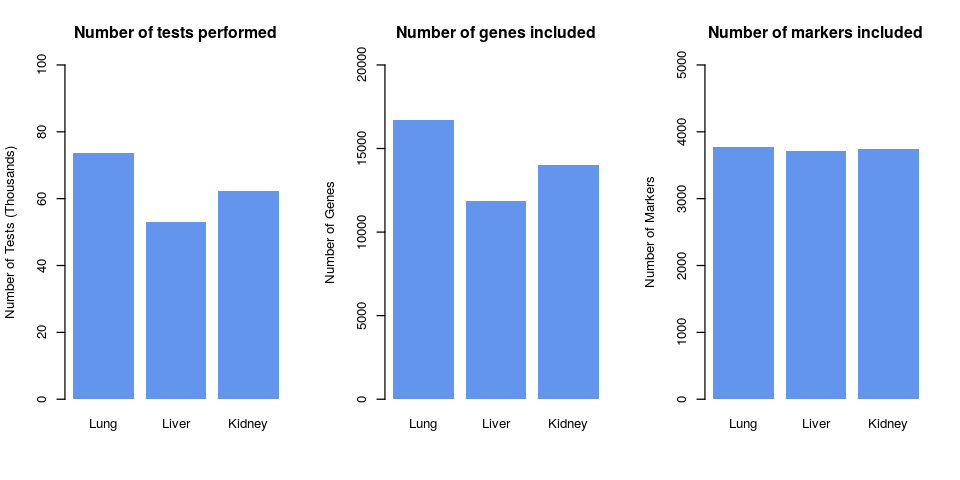

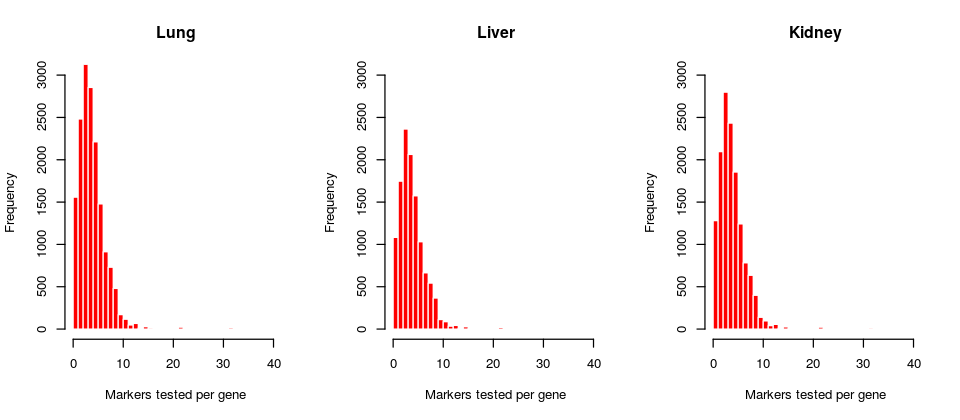

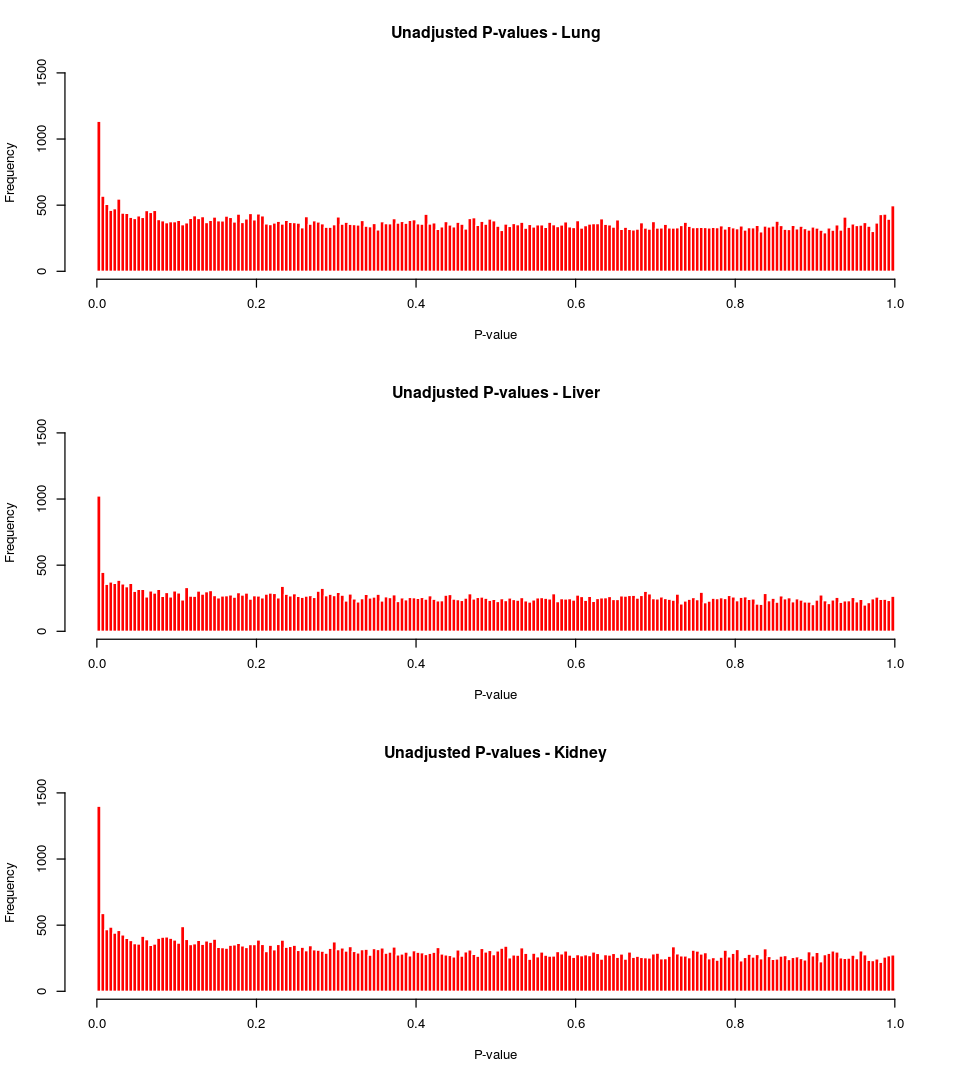

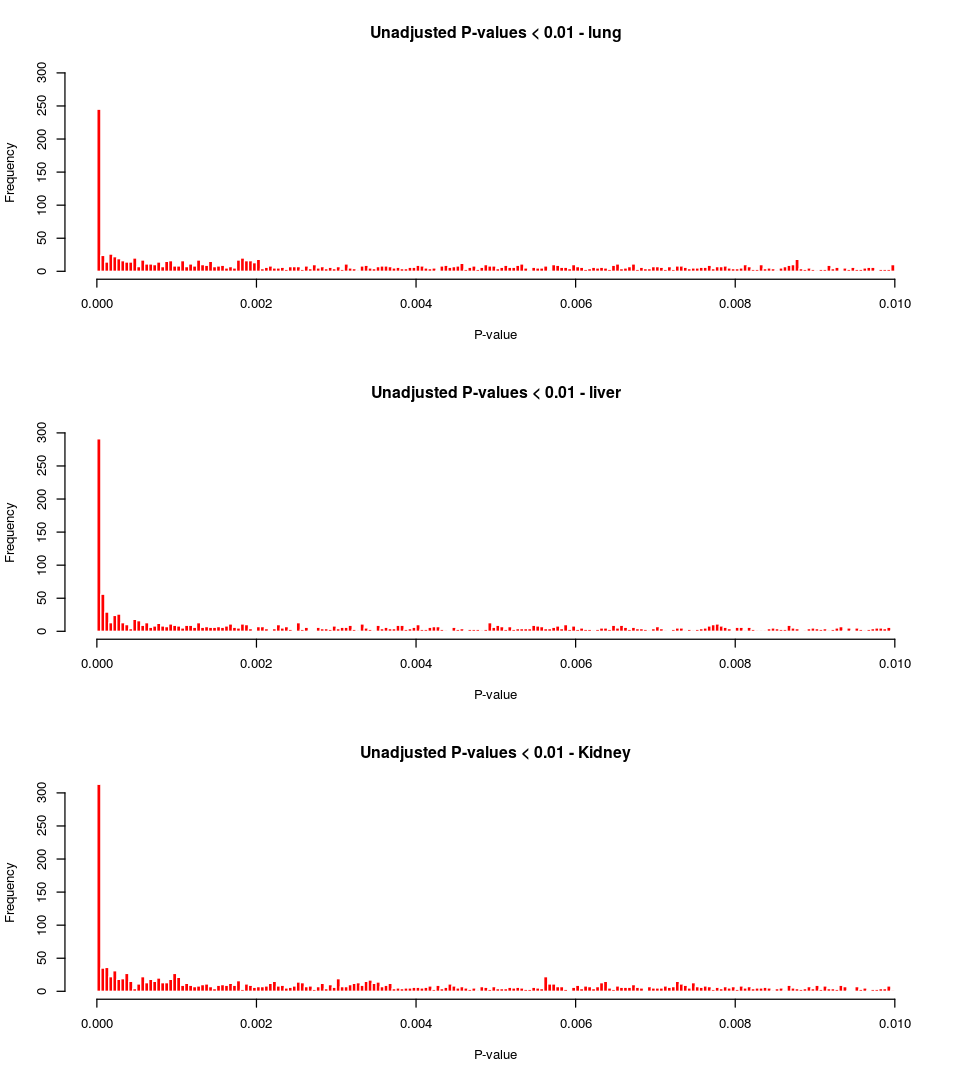

In [5]:
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

total.runs <- c(total.runs.lung, total.runs.liver, total.runs.kidney)
num.genes.tested <- c(num.genes.tested.lung, num.genes.tested.liver, num.genes.tested.kidney)
num.markers.tested <- c(num.markers.tested.lung, num.markers.tested.liver, num.markers.tested.kidney)

#Number of tests, genes, and markers
par(mfrow=c(1,3))
barplot(height=total.runs/1000, beside=T, ylab="Number of Tests (Thousands)", ylim=c(0,100),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of tests performed")
barplot(height=num.genes.tested, beside=T, ylab="Number of Genes", ylim=c(0,20000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of genes included")
barplot(height=num.markers.tested, beside=T, ylab="Number of Markers", ylim=c(0,5000),
        border=NA, col="cornflowerblue",
        names.arg=c("Lung","Liver","Kidney"), 
        main="Number of markers included")

#Markers per gene
options(repr.plot.width=8, repr.plot.height=3.5)
par(mfrow=c(1,3))
hist(m.per.gene.lung, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Lung",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.liver, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Liver",
     ylab="Frequency", 
     xlab="Markers tested per gene")
hist(m.per.gene.kidney, breaks=49, freq=T, ylim=c(0,3000), 
     col="red", border="white",
     main="Kidney",
     ylab="Frequency", 
     xlab="Markers tested per gene")

#P-value distributions
options(repr.plot.width=8, repr.plot.height=9)
par(mfrow=c(3,1))
hist(pvals.lung, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Lung",
     ylab="Frequency",
     xlab="P-value")
hist(pvals.liver, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney, breaks=200, freq=T, ylim=c(0,1500), 
     col="red", border="white",
     main="Unadjusted P-values - Kidney",
     ylab="Frequency", 
     xlab="P-value")

par(mfrow=c(3,1))
hist(pvals.lung[which(pvals.lung < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - lung",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.liver[which(pvals.liver < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - liver",
     ylab="Frequency", 
     xlab="P-value")
hist(pvals.kidney[which(pvals.kidney < 0.01)], breaks=200, freq=T, ylim=c(0,300), 
     col="red", border="white",
     main="Unadjusted P-values < 0.01 - Kidney",
     ylab="Frequency", 
     xlab="P-value")


## Retrieving most significant tests

For each tissue, we retrieve the 100 gene-marker pairs that produced the most significant p-values and list them below.

In [6]:
library(dplyr)

# Function for searching p-value matrix
#
# Args:
#   needle - value to find
#   haystack - matrix to search through
#
# Returns a dataframe of the p-values with gene and marker names listed
find.value <- function(needle, haystack){
    hits <- which(haystack==needle, arr.ind=T)
    rnames <- rownames(haystack)[hits[,1]]
    cnames <- colnames(haystack)[hits[,2]]
    results <- c()
    for(i in 1:nrow(hits)){
        record <- c(rnames[i], cnames[i], needle)
        results <- rbind(results, record)
    }
    return(data.frame(results))
}

#Get p-value matrices for each tissue
load("data/625ppm_vs_1500ppm_lung.Rdata")
matrix.lung <- out.mat
load("data/625ppm_vs_1500ppm_liver.Rdata")
matrix.liver <- out.mat
load("data/625ppm_vs_1500ppm_kidney.Rdata")
matrix.kidney <- out.mat


#Get top 100 p-values per tissue
top.lung <- sort(pvals.lung)[1:100]
top.liver <- sort(pvals.liver)[1:100]
top.kidney <- sort(pvals.kidney)[1:100]

#Create gene and marker list for significant hits
lung.list <- bind_rows(lapply(top.lung, function(x){find.value(x, matrix.lung)}))
liver.list <- bind_rows(lapply(top.liver, function(x){find.value(x, matrix.liver)}))
kidney.list <- bind_rows(lapply(top.kidney, function(x){find.value(x, matrix.kidney)}))
colnames(lung.list) <- c("Gene", "Marker", "P-value")
colnames(liver.list) <- c("Gene", "Marker", "P-value")
colnames(kidney.list) <- c("Gene", "Marker", "P-value")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”Warning message in bind_rows_(x, .id):
“Unequal factor levels: coercing to character”

In [8]:
#Display tables
cat("Lung\n")
lung.list
cat("Liver\n")
liver.list
cat("Kidney\n")
kidney.list

#Write tables to file
write.table(x=lung.list, file="results/lung_top100_hits_unadjusted_pvals_625_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=liver.list, file="results/liver_top100_hits_unadjusted_pvals_625_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")
write.table(x=kidney.list, file="results/kidney_top100_hits_unadjusted_pvals_625_vs_1500.txt", 
            quote=F, row.names=F, col.names=T, sep="\t")

Lung


Gene          Marker                         P-value              
1   Ttc22         UNC7932936.UNC7947729          2.66467770159274e-104
2   Ttc22         JAX00561354.JAX00561354        4.62869318971432e-104
3   Ttc22         JAX00122955.UNC7931463         4.6624147382536e-104 
4   Ttc22         UNC7913411.UNC7928876          5.14730455118891e-104
5   Ttc22         UNC7905375.UNC040215368        5.93341867732017e-104
6   Glipr2        UNC7134471.UNC7149801          7.45889410589787e-88 
7   Glipr2        UNC041043835.JAX00549124       8.31936152835998e-88 
8   Glipr2        UNC7150041.UNC040499102        8.69467917654037e-88 
9   Stfa1         UNC26653811.UNC26655798        1.05955631504126e-76 
10  Fbxo40        UNC160204180.UNC26667086       6.36656827467056e-51 
11  Fbxo40        UNC26653811.UNC26655798        1.05200397749058e-50 
12  Fkbp5         JAX00435265.UNC27752624        2.18787049511048e-47 
13  Hook1         UNC7778493.UNC7800092          9.80520693875572e-44 
14  Ndufb4        UNC26653811.UNC26655798        3.0390280084587e-38  
15  Obp2a         UNC2746803.UNC2747334          2.75588802544505e-34 
16  Impa1         UNC4696231.UNC4770292          8.13952871956924e-34 
17  Serpina4-ps1  UNC21786436.UNC21786664        1.13991936660596e-33 
18  Tnfaip2       UNC21878039.UNC21894866        1.03526397558703e-29 
19  Tnfaip2       UNC21894871.UNC21910865        1.94972517192343e-29 
20  Eya1          UNC130265.UNC134669            5.94543596710017e-27 
21  Ubash3a       UNC27753023.UNC27767093        1.38095766388895e-26 
22  Nr1i2         UNC26676167.UNC26684229        1.06564673594808e-24 
23  Nr1i2         UNC26667543.UNC26676137        6.80067035125783e-24 
24  Hcls1         UNC26653811.UNC26655798        1.22309413388572e-23 
25  Hcls1         UNC160204180.UNC26667086       1.34489581159896e-23 
26  Ndufb4        UNC160204180.UNC26667086       4.66189002395194e-23 
27  Ndufb4        UNC26667543.UNC26676137        4.895333025148e-23   
28  Nrd1          UNC7932936.UNC7947729          5.26179351096432e-22 
29  Serpina3k     UNC21786436.UNC21786664        4.43068971012909e-21 
30  Pkia          UNC4648546.UNC4678067          5.46980312454482e-20 
⋮   ⋮             ⋮                              ⋮                    
71  Ppp4r1        UNC28207322.UNC28210289        3.82741283289905e-14 
72  Psca          UNC25896223.UNC25904367        6.76101519290853e-14 
73  Gen1          JAX00325494.UNC20623452        1.90427853161264e-13 
74  1110037F02Rik backupUNC040475692.JAX00545248 2.30367579277591e-12 
75  1110037F02Rik UNC6742980.UNC040602308        2.34579475889123e-12 
76  Serpina3m     UNC21786436.UNC21786664        6.83927945710521e-12 
77  Slc35d1       UNC7859499.UNC7873155          6.88876465799058e-12 
78  Mir6988       UNC29856661.UNC29864970        7.66059865051116e-12 
79  Mir6988       JAX00469668.UNC29855954        7.68438885848004e-12 
80  Slc35d1       UNC7873851.UNC7888795          1.21821593830915e-11 
81  Igsf23        UNC12479791.UNC12510962        1.58546553012914e-11 
82  Igsf23        UNC12476157.UNC12479182        1.65519699370228e-11 
83  Hltf          JAX00516260.UNC4839666         2.84611567120381e-11 
84  Hltf          JAX00104869.UNC4813610         4.40000153913747e-11 
85  Hltf          UNC4814654.UNC4820379          5.35921445425605e-11 
86  Sec16a        UNC2769757.JAX00092398         5.80089255166823e-11 
87  Myf6          UNC18577118.UNC18653313        7.84127022882712e-11 
88  Myf6          UNC100187548.JAX00298355       7.94853683536912e-11 
89  Myf6          UNC18654283.JAX00298238        7.97009503544673e-11 
90  Arf3          UNC26210905.UNC26211240        8.60086260653068e-11 
91  Myf6          JAX00298356.UNC18699971        1.16637209035375e-10 
92  Mir5116       UNC200056198.JAX00712044       1.3958891835655e-10  
93  Mir5116       JAX00179390.UNC30852286        1.40958311073841e-10 
94  Gbas          UNC050221527.UNC10173125       1.55333234934586e-10 
95  Zyg11b        UNC7932936

Liver


Gene          Marker                   P-value              
1   E2f7          UNC18700285.UNC18708909  1.46935414584953e-126
2   Cyp3a59       UNC050433302.UNC10384598 4.88698062828173e-96 
3   Cyp3a59       UNC10384922.UNC10385552  6.36209682380735e-96 
4   Flt1          JAX00600891.UNC10401202  5.24139021927644e-81 
5   Flt1          UNC10385644.UNC10395146  1.00704603606973e-80 
6   Flt1          UNC10397739.JAX00600890  1.06506282964134e-80 
7   Flt1          UNC10406187.UNC050249355 1.29162806433148e-80 
8   Flt1          UNC10397110.JAX00136998  1.30083715843489e-80 
9   Flt1          UNC10406637.UNC10414582  1.34318474355747e-80 
10  Obp2a         UNC2746803.UNC2747334    1.25942670699263e-64 
11  3110043O21Rik UNC7054545.UNC7060540    6.67634736734182e-60 
12  Cdkn1a        UNC27753023.UNC27767093  1.12272893257743e-55 
13  Cyp3a59       UNC10365932.UNC10371047  1.42261783276513e-53 
14  Flt1          UNC10419602.UNC10428605  4.86225313629289e-43 
15  Flt1          UNC10395292.UNC10397004  4.91521252083593e-43 
16  Ctdsp2        UNC18954707.UNC18961845  5.8046957182535e-42  
17  Ctdsp2        UNC18954024.UNC18954348  6.54941391787474e-42 
18  Flt1          UNC10404645.UNC10405837  9.03538349163881e-42 
19  Bcl6          UNC26489252.UNC26489252  1.58455862395822e-39 
20  Bcl6          UNC26489493.UNC26508271  1.64980003873646e-39 
21  Bcl6          UNC26482789.UNC26489040  1.68882674815353e-39 
22  Bcl6          UNC26482218.UNC26482549  1.97659697248003e-38 
23  Bcl6          UNC26481882.UNC26481882  2.42447532314899e-38 
24  Nfil3         UNC22598191.UNC22613247  1.23405460061169e-37 
25  Gstt3         UNC18245269.UNC18248787  2.37847850150356e-35 
26  Snora75       UNC1067986.JAX00006232   2.53786500291545e-35 
27  Snora75       JAX00258020.UNC1103435   2.560302469303e-35   
28  Gstt3         UNC18201974.UNC18243811  3.4985643128179e-34  
29  Cox7a1        UNC12572462.UNC12573732  6.69500547931489e-32 
30  Rhbdd2        UNC10247043.UNC10251963  1.54242718841047e-30 
⋮   ⋮             ⋮                        ⋮                    
71  Pla2g16       UNC29865458.UNC29866758  5.53942844944973e-12 
72  Pla2g16       JAX00469933.JAX00469941  5.54895094958764e-12 
73  Pla2g16       JAX00469943.JAX00469945  5.55528167470694e-12 
74  Pla2g16       UNC29867469.UNC29867469  5.55945922327073e-12 
75  Dusp10        UNC2340030.JAX00278797   8.82097102848685e-12 
76  Dusp10        UNC2337975.UNC010411487  9.10299819126138e-12 
77  Hist1h1e      UNC22263703.UNC22267580  3.20104173307664e-11 
78  Hist1h1e      UNC22234794.UNC22263112  4.8645755936392e-11  
79  4930545H06Rik UNC18153616.JAX00291896  5.7995837476629e-11  
80  Ly6g          UNC25888851.UNC25895704  6.29934031552679e-11 
81  9430037G07Rik UNC16814383.UNC16822579  8.35594282435085e-11 
82  9430037G07Rik UNC090178541.UNC16883357 8.46219089800018e-11 
83  Lnx2          UNC10395292.UNC10397004  1.03235710915052e-10 
84  Slc22a26      UNC29856661.UNC29864970  1.03815789617106e-10 
85  Slc22a26      UNC29865283.UNC29865283  1.05628121035178e-10 
86  Slc22a26      UNC29865458.UNC29866758  1.0696447508168e-10  
87  Slc22a26      JAX00469668.UNC29855954  1.07575870348047e-10 
88  Hip1          UNC10247043.UNC10251963  1.0841302193873e-10  
89  Slc22a26      JAX00469933.JAX00469941  1.087605876936e-10   
90  Slc22a26      JAX00469943.JAX00469945  1.09793697297262e-10 
91  Slc22a26      UNC29867469.UNC29867469  1.10424664490672e-10 
92  Slc22a26      JAX00469956.UNC29869053  1.11709215911367e-10 
93  Slc22a26      UNC29869217.UNC29869217  1.13019813695881e-10 
94  Tns1          UNC932547.UNC939418      1.13314442738393e-10 
95  Slc22a26      UNC29869312.UNC29869312  1.1346148340449e-10  
96  Slc22a26      UNC29869483.UNC29869587  1.14127642420594e-10 
97  Slc22a26      UNC29869670.UNC29869670  1.14797394290455e-10 
98  Slc22a26      UNC29869762.UNC29869981  1.15694272268264e-10 
99  U2af1         UNC27780949.UNC27786598  1.39484490717697e-10 
100 Tmem86a       UNC12754049.UNC127725

Kidney


Gene      Marker                                P-value              
1   Vmn1r184  UNC12521588.UNC12531236               1.54462754439198e-101
2   Lynx1     UNC25871106.UNC25886541               9.0493242779004e-94  
3   Lynx1     UNC25886803.UNC25888076               9.83104159069195e-94 
4   Gm933     UNC26571789.UNC26602350               1.55414236054947e-84 
5   Hist1h2be UNC22234794.UNC22263112               3.93625182422618e-84 
6   Hist1h2be UNC22263703.UNC22267580               4.0805392504778e-84  
7   Vmn1r184  UNC12514662.JAX00149482               3.98251900550274e-58 
8   Vmn1r184  UNC12512623.UNC12514434               4.17315308723319e-58 
9   Vmn1r184  UNC12521377.UNC12521377               1.73769239638354e-57 
10  Erbb3     JAX00302230.UNC18984159               5.48256407917423e-56 
11  Erbb3     UNC18954707.UNC18961845               1.06062715879478e-55 
12  Peg13     UNC25865603.JAX00063539               2.01135536915818e-53 
13  Peg13     UNC25868932.JAX00405405               2.09764265392751e-53 
14  Peg13     UNC25871106.UNC25886541               2.11323234128967e-53 
15  Peg13     UNC25858074.UNC25863874               3.87778852531299e-53 
16  Peg13     UNC25864050.UNC25865397               4.63785909777081e-53 
17  Hist1h4a  UNC22263703.UNC22267580               5.27206740421883e-44 
18  Hist1h4a  UNC22234794.UNC22263112               5.90366901731588e-44 
19  Pdilt     UNC13709012.UNC13719930               4.67993042688904e-43 
20  Pan3      UNC050433302.UNC10384598              1.72153352413668e-39 
21  Btg1      JAX00296880.UNC18521881               1.23021562942073e-37 
22  Lynx1     UNC25896223.UNC25904367               3.39083029224238e-35 
23  Apoc3     UNC16293312.UNC16298943               3.33667944897417e-30 
24  Apoc3     JAX00170692.UNC16292726               3.62335268612641e-30 
25  Gm933     UNC26611901.UNC26632751               5.80461616327899e-30 
26  Gm933     UNC26606735.UNC160297022              5.80461616328352e-30 
27  Gm933     UNC160202433.UNC160203517             5.80461616352278e-30 
28  Tbc1d15   JAX00299388.JAX00299388               8.20518526116991e-27 
29  Tbc1d15   UNC18767269.UNC18771250               8.37416630909716e-27 
30  Tbc1d15   UNC18771926.UNC18777516               9.06503063197626e-27 
⋮   ⋮         ⋮                                     ⋮                    
71  Mafk      UNC10307389.UNC10309067               1.03674632416514e-14 
72  Tbc1d15   UNC18741685.UNC18766272               5.85578176211058e-14 
73  Tbc1d15   UNC18780746.backupUNC100253553        6.67415920287051e-14 
74  Sav1      UNC21317215.UNC21357767               8.01618163079734e-14 
75  Tbc1d15   UNC18783466.UNC18790786               9.31924243643802e-14 
76  Sav1      JAX00037493.JAX00037493               1.27668088360913e-13 
77  Sav1      JAX00337171.UNC21362988               2.00038054491756e-13 
78  Kcnn2     UNC29148462.UNC29160709               4.74954048443131e-13 
79  Kcnn2     UNC180270327.UNC29165311              4.76833189927566e-13 
80  Apopt1    UNC21878039.UNC21894866               1.0228059283549e-12  
81  Kcnn2     UNC29181321.UNC29220463               1.24470536562733e-12 
82  Kcnn2     JAX00082899.JAX00082899               1.33594927263394e-12 
83  Kcnn2     UNC29166585.JAX00213157               1.33716441870657e-12 
84  Pan3      UNC10397739.JAX00600890               1.36390708244308e-12 
85  Pan3      UNC10397110.JAX00136998               1.59320776666118e-12 
86  Gm7861    UNC14299130.UNC14299130               1.75045536230232e-12 
87  Gm7861    UNC14296105.UNC14298810               1.75054454385164e-12 
88  Gm7861    UNC14293593.UNC080079721              1.7507362208013e-12  
89  Gm7861    backupUNC080079599.backupUNC080079599 1.75073638419524e-12 
90  Gm7861    UNC14292294.UNC14292656               1.75073836771731e-12 
91  Sdhaf2    UNC29880316.UNC29880316               1.91745409450864e-12 
92  Sdhaf2    UNC29880732.JAX00470212               1.92608976994214e-12 
93  Sdha